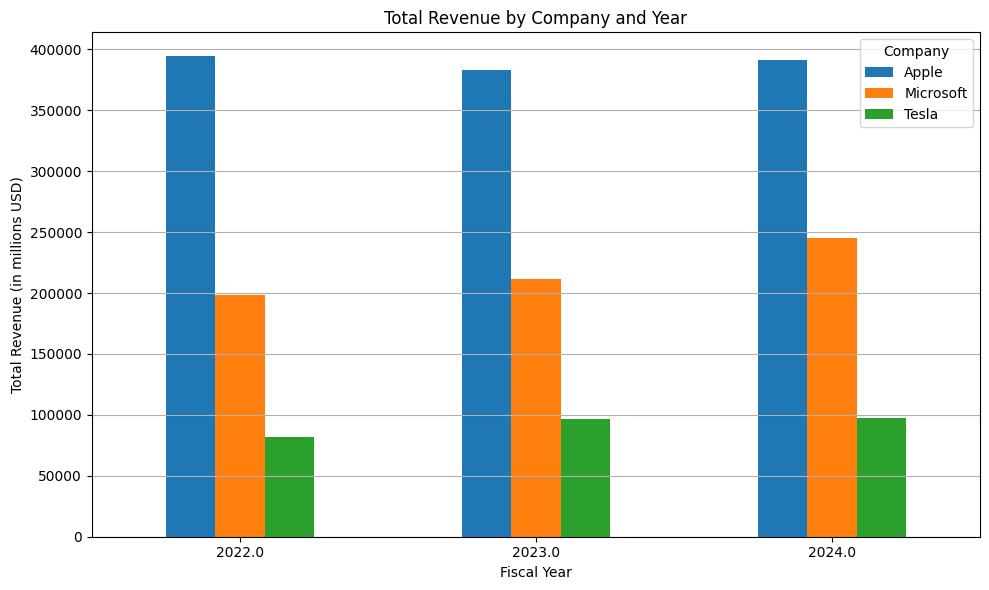

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("C:/Users/alena/OneDrive/Documents/financial_data.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("__", "_", regex=False)

# Remove unnamed and empty columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Fix for column name that became 'Total_Assets' after normalization
df.rename(columns={'Total__Assets': 'Total_Assets'}, inplace=True)

# Columns to clean
clean_cols = [
    'Total_Revenue',
    'Net_Income',
    'Total_Assets',
    'Total_Liabilities',
    'Cash_Flow_from_Operating_Activities'
]

# Clean number formatting
for col in clean_cols:
    df[col] = df[col].astype(str).str.replace(r"[^\d.-]", "", regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop incomplete rows
df = df.dropna(subset=['Fiscal_Year', 'Company'])

# Plot Revenue
pivot_revenue = df.pivot(index="Fiscal_Year", columns="Company", values="Total_Revenue")
pivot_revenue.plot(kind="bar", figsize=(10,6), title="Total Revenue by Company and Year")
plt.ylabel("Total Revenue (in millions USD)")
plt.xlabel("Fiscal Year")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
